In [1]:
ratings = read.csv('movielens-user-genre-ratings.csv')
points = ratings[,2:ncol(ratings)]

In [2]:
library(caret)

preproc = preProcess(points)

pointsnorm = predict(preproc, points)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
“replacing previous import ‘stats::sigma’ by ‘robustbase::sigma’ when loading ‘ddalpha’”

In [5]:
max(pointsnorm$adventure)

[1] 7.013803

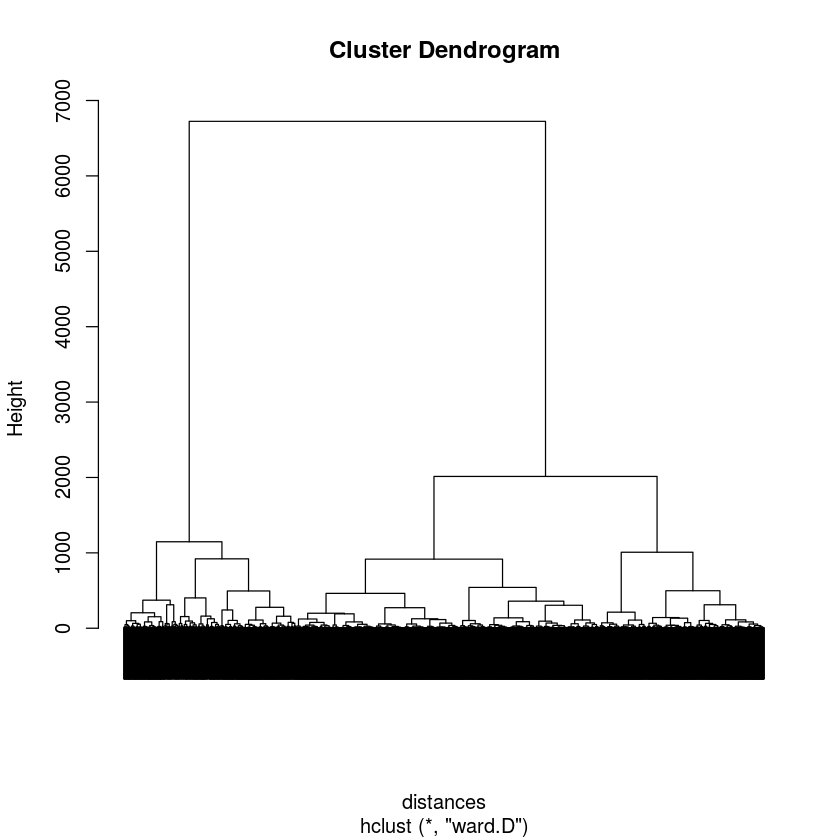

In [6]:
distances = dist(pointsnorm, method = "euclidean")

dend = hclust(distances, method = "ward.D")

plot(dend, labels = FALSE)

In [8]:
library(caTools)
set.seed(200)
km = kmeans(pointsnorm, centers = 5)
table(km$cluster)


   1    2    3    4    5 
2084  942 3968  748 1402 

In [9]:
cluster1 = subset(pointsnorm, km$cluster == 1)
cluster2 = subset(pointsnorm, km$cluster == 2)
cluster3 = subset(pointsnorm, km$cluster == 3)
cluster4 = subset(pointsnorm, km$cluster == 4)
cluster5 = subset(pointsnorm, km$cluster == 5)

In [13]:
colMeans(cluster1)

action    adventure    animation     children       comedy        crime 
 0.549594791  0.282473213 -0.103582638 -0.298463822 -0.273848675  0.274774655 
 documentary        drama      fantasy    film.noir       horror         imax 
-0.183258850 -0.163851252  0.071648830 -0.205877990  0.336390422  0.471851335 
     musical      mystery      romance       sci.fi     thriller          war 
-0.541933880  0.264565685 -0.416417247  0.557995150  0.492591158  0.001619124 
     western 
-0.088954965